In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns


In [3]:
# %pwd
# %cd c:\\Users\\satoc\\Desktop\\ritual

c:\Users\satoc\Desktop\ritual


In [4]:
df = pd.read_csv('./data_converted.tsv', sep='\t')

In [5]:
df['attention_check'].value_counts()

Amazon MTurk    106
Lancers          14
Qualtrics         1
Name: attention_check, dtype: int64

In [6]:
df = df[df['attention_check'] == 'Amazon MTurk']

In [7]:
variables = list(df.columns)
q2s = [x for x in variables if x.startswith('q2')]
v_stimuli = [x for x in variables if x.startswith('stm')]
items = ['effect', 'significance', 'complexity', 'regularity', 'randomness']

In [8]:
# df_mean = pd.DataFrame(df[v_stimuli].mean())

In [9]:
df_mean = df[['condition'] + v_stimuli].groupby('condition').mean().T

In [10]:
df_mean['stimulus'] = [x.split('_')[0] for x in list(df_mean.index)]
df_mean['variable'] = [x.split('_')[1] for x in list(df_mean.index)]

In [11]:
df_mean

condition,x,y,stimulus,variable
stm01_1,2.274510,3.109091,stm01,1
stm01_2,2.450980,3.218182,stm01,2
stm01_3,1.352941,1.363636,stm01,3
stm01_4,5.000000,5.472727,stm01,4
stm01_5,1.843137,1.454545,stm01,5
...,...,...,...,...
stm32_1,2.901961,3.036364,stm32,1
stm32_2,2.901961,3.090909,stm32,2
stm32_3,1.960784,2.090909,stm32,3
stm32_4,3.725490,4.000000,stm32,4


In [12]:
df_mean = df_mean.reset_index(drop=True).set_index(['stimulus', 'variable']).unstack('variable').stack('condition')

In [13]:
df_mean

variable                   1         2         3         4         5
stimulus condition                                                  
stm01    x          2.274510  2.450980  1.352941  5.000000  1.843137
         y          3.109091  3.218182  1.363636  5.472727  1.454545
stm02    x          3.019608  2.960784  2.000000  4.254902  2.568627
         y          3.309091  3.163636  2.036364  4.090909  2.272727
stm03    x          2.705882  2.705882  2.588235  3.254902  3.215686
...                      ...       ...       ...       ...       ...
stm30    y          3.290909  3.127273  3.600000  2.890909  3.690909
stm31    x          3.235294  3.137255  2.431373  3.901961  2.647059
         y          3.581818  3.654545  2.945455  4.127273  2.490909
stm32    x          2.901961  2.901961  1.960784  3.725490  2.666667
         y          3.036364  3.090909  2.090909  4.000000  2.581818

[64 rows x 5 columns]

In [14]:
df_mean.columns = ['effect', 'significance', 'complexity', 'regularity', 'randomness']

In [15]:
df_mean = df_mean.reset_index()

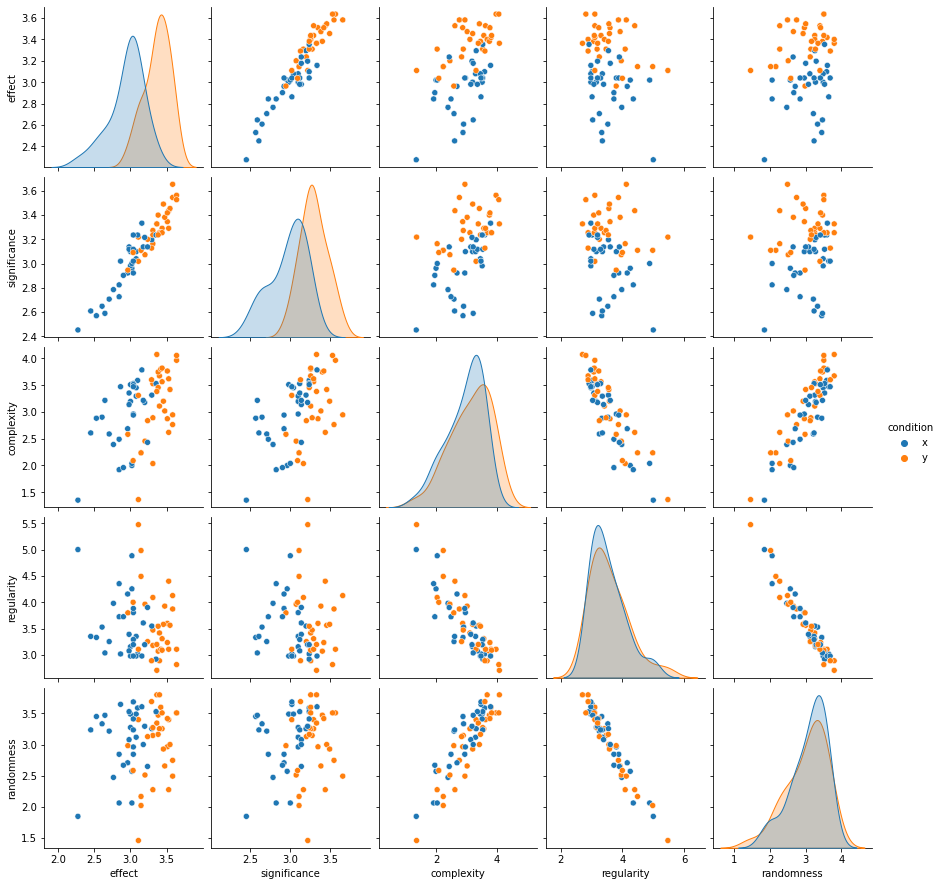

In [16]:
sns.pairplot(df_mean, hue='condition')

In [17]:
df_mean.corr()

,effect,significance,complexity,regularity,randomness
effect,1.000000,0.944248,0.476949,-0.195495,0.165367
significance,0.944248,1.000000,0.481232,-0.186138,0.158402
complexity,0.476949,0.481232,1.000000,-0.868300,0.887721
regularity,-0.195495,-0.186138,-0.868300,1.000000,-0.971444
randomness,0.165367,0.158402,0.887721,-0.971444,1.000000


In [18]:
df_mean.corr(method='spearman')

,effect,significance,complexity,regularity,randomness
effect,1.000000,0.932789,0.470464,-0.154348,0.142428
significance,0.932789,1.000000,0.524323,-0.213765,0.205412
complexity,0.470464,0.524323,1.000000,-0.851139,0.865458
regularity,-0.154348,-0.213765,-0.851139,1.000000,-0.966262
randomness,0.142428,0.205412,0.865458,-0.966262,1.000000


In [19]:
df_stimuli = df[['id', 'condition'] + v_stimuli]
df_stimuli = df_stimuli.set_index(['id', 'condition']).stack()
df_stimuli = df_stimuli.reset_index()
df_stimuli.columns = ['id', 'condition', 'item', 'value']

df_stimuli['stimulus'] = [x.split('_')[0] for x in df_stimuli['item']]
df_stimuli['variable'] = [x.split('_')[1] for x in df_stimuli['item']]
df_stimuli = df_stimuli[[x for x in list(df_stimuli.columns) if not x == 'item']]
df_stimuli = df_stimuli.reset_index(drop=True).set_index(['id', 'condition', 'stimulus', 'variable']).unstack('variable')
df_stimuli.columns = ['effect', 'significance', 'complexity', 'regularity', 'randomness']
df_stimuli.reset_index()


,id,condition,stimulus,effect,significance,complexity,regularity,randomness
0,1,y,stm01,3,3,3,3,3
1,1,y,stm02,3,2,1,1,1
2,1,y,stm03,4,4,5,4,4
3,1,y,stm04,4,4,4,4,4
4,1,y,stm05,4,4,4,4,4
...,...,...,...,...,...,...,...,...
3387,120,x,stm28,2,2,3,4,3
3388,120,x,stm29,4,4,4,3,4
3389,120,x,stm30,2,2,5,2,5
3390,120,x,stm31,5,5,1,6,1


In [20]:
result = []

for i in df['id']:
    x = df_stimuli.loc[i].corr()
    x['id'] = i
    x['condition'] = df_stimuli.loc[i].index[0][0]
    if x.isna().sum().sum() > 0:
        # nanを含むものは除外
        print(i)
        print(x)
        continue
    record = x.reset_index().set_index(['id', 'condition', 'index']).stack()
    result.append(record)
df_r = pd.concat(result)


7
              effect  significance  complexity  regularity  randomness  id  \
effect           NaN           NaN         NaN         NaN         NaN   7   
significance     NaN           NaN         NaN         NaN         NaN   7   
complexity       NaN           NaN    1.000000   -0.144174    0.688098   7   
regularity       NaN           NaN   -0.144174    1.000000   -0.471080   7   
randomness       NaN           NaN    0.688098   -0.471080    1.000000   7   

             condition  
effect               x  
significance         x  
complexity           x  
regularity           x  
randomness           x  
14
              effect  significance  complexity  regularity  randomness  id  \
effect           NaN           NaN         NaN         NaN         NaN  14   
significance     NaN           NaN         NaN         NaN         NaN  14   
complexity       NaN           NaN    1.000000   -0.072412    0.063036  14   
regularity       NaN           NaN   -0.072412    1.000000   -0.

In [21]:
df_r = df_r.reset_index()
df_r.columns = ['id', 'condition', 'var1', 'var2', 'r']
df_r = df_r[df_r['var1'] != df_r['var2']]

In [22]:
item_set = []
for i in items:
    item_set += [(i, x) for x in items if x != i and (x, i) not in set(item_set)]
item_set = set(item_set)

df_r['set'] = [(x['var1'], x['var2']) for i, x in df_r.iterrows()]

In [23]:
df_r = df_r[[x in item_set for x in df_r['set']]]


In [24]:
df_r_result = df_r.set_index(['id', 'condition', 'set']).unstack('set')['r']

In [25]:
df_r_result.describe().T

,count,mean,std,min,25%,50%,75%,max
set,,,,,,,,
"(complexity, randomness)",98.0,0.549547,0.339418,-0.539085,0.331269,0.632005,0.837697,0.979754
"(complexity, regularity)",98.0,-0.515924,0.443845,-0.971083,-0.841438,-0.674423,-0.316721,0.979754
"(effect, complexity)",98.0,0.256317,0.426678,-0.805647,-0.047997,0.240386,0.673331,0.925238
"(effect, randomness)",98.0,-0.027047,0.458256,-0.884296,-0.390049,-0.102656,0.338625,0.861552
"(effect, regularity)",98.0,0.075908,0.451332,-0.895544,-0.213813,0.114365,0.441935,0.820942
"(effect, significance)",98.0,0.772183,0.214094,-0.015495,0.662706,0.854596,0.933294,1.000000
"(regularity, randomness)",98.0,-0.630740,0.400797,-1.000000,-0.871142,-0.792574,-0.515156,1.000000
"(significance, complexity)",98.0,0.241346,0.424632,-0.786750,-0.077342,0.251451,0.617304,0.928465
"(significance, randomness)",98.0,-0.050279,0.460988,-0.884296,-0.422591,-0.125824,0.325251,0.883670


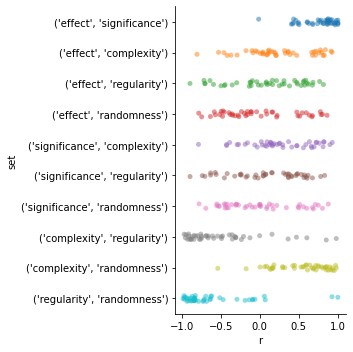

In [26]:
sns.catplot(x='r', y='set', data=df_r[df_r['condition'] == 'x'], alpha=0.5)

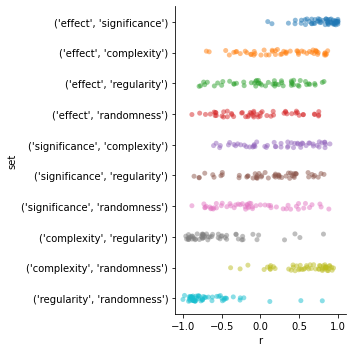

In [27]:
sns.catplot(x='r', y='set', data=df_r[df_r['condition'] == 'y'], alpha=0.5)

<AxesSubplot:xlabel='r', ylabel='set'>

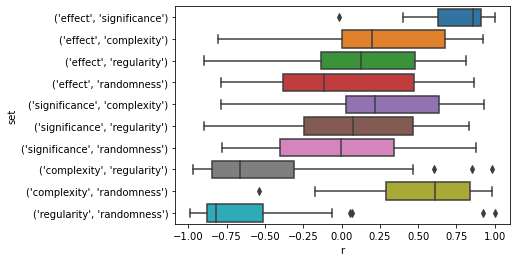

In [28]:
sns.boxplot(x='r', y='set', data=df_r[df_r['condition'] == 'x'])

<AxesSubplot:xlabel='r', ylabel='set'>

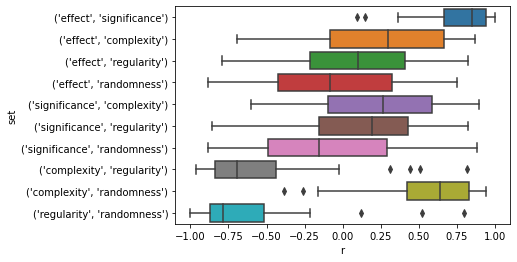

In [29]:
sns.boxplot(x='r', y='set', data=df_r[df_r['condition'] == 'y'])

In [30]:
def count_letter(string, character):
    return sum([1 for x in string if x == character])


def reverse_letter(string):
    return ''.join(['0' if x == '1' else '1' for x in string])


def is_repetition2(string):
    if string[:3] == string[3:]:
        return 1
    return 0


def is_repetition3(string):
    if string[:2] == string[2:4] and string[:2] == string[4:]:
        return 1
    return 0


def is_palindrome(string):
    if string[:3] == string[3:][::-1]:
        return 1
    return 0


def get_runlength(string):
    last_letter = ''
    n_count = 1
    result = []
    for i, s in enumerate(string):
        if last_letter == s:
            n_count += 1
            continue
        if last_letter:
            result.append(f'{last_letter}{n_count}')
        last_letter = s
        n_count = 1
    result.append(f'{last_letter}{n_count}')
    return ''.join(result)


In [31]:
stimuli = pd.read_csv('./stimuli.tsv', sep='\t')
stimuli['string'] = stimuli['stimulus'].str[1:]
stimuli['type'] = stimuli['stimulus'].str[0].str.lower()


In [32]:
stms = [f'stm{i:02}' for i in range(1, 33)]
strings = {i:x for i, x in zip(list(stimuli['string'][:32]), stms)}
stimuli['stm'] = stimuli['string'].map(lambda x: strings[x])

stimuli['actual'] = [x['string'] if x['type'] == 'x' else reverse_letter(x['string']) for i,x in stimuli.iterrows()]

In [33]:
stimuli['0s'] = stimuli['actual'].apply(count_letter, character='0')
stimuli['1s'] = stimuli['actual'].apply(count_letter, character='1')
stimuli['is_palindrome'] = stimuli['actual'].map(is_palindrome)
stimuli['is_rep2'] = stimuli['actual'].map(is_repetition2)
stimuli['is_rep3'] = stimuli['actual'].map(is_repetition3)
stimuli['runlength'] = stimuli['actual'].map(get_runlength)
# binaryの場合, 最初の文字がわかれば以降の文字種の記述は不要
stimuli['runlength_size'] = stimuli['runlength'].str.len() / 2 + 1

In [34]:
stimuli.to_csv('stimuli_stats.tsv', sep='\t', index=None)

In [35]:
structures = [
        '0s',
        '1s',
        'is_palindrome',
        'is_rep2',
        'is_rep3',
        'runlength_size',
        ]

In [36]:
pd.crosstab(stimuli['is_palindrome'], stimuli['is_rep2'])

is_rep2,0,1
is_palindrome,,
0,52,4
1,4,4


In [37]:
pd.crosstab(stimuli['is_palindrome'], stimuli['is_rep3'])

is_rep3,0,1
is_palindrome,,
0,54,2
1,6,2


In [38]:
pd.crosstab(stimuli['runlength_size'], stimuli['is_rep2'])

is_rep2,0,1
runlength_size,,
2.0,0,2
3.0,10,0
4.0,20,0
5.0,16,4
6.0,8,2
7.0,2,0


In [39]:
pd.crosstab(stimuli['runlength_size'], stimuli['is_rep3'])

is_rep3,0,1
runlength_size,,
2.0,0,2
3.0,10,0
4.0,20,0
5.0,20,0
6.0,10,0
7.0,0,2


In [40]:
pd.crosstab(stimuli['runlength_size'], stimuli['is_palindrome'])

is_palindrome,0,1
runlength_size,,
2.0,0,2
3.0,10,0
4.0,16,4
5.0,20,0
6.0,8,2
7.0,2,0


In [41]:
stimuli['type']

0     x
1     x
2     x
3     x
4     x
     ..
59    y
60    y
61    y
62    y
63    y
Name: type, Length: 64, dtype: object

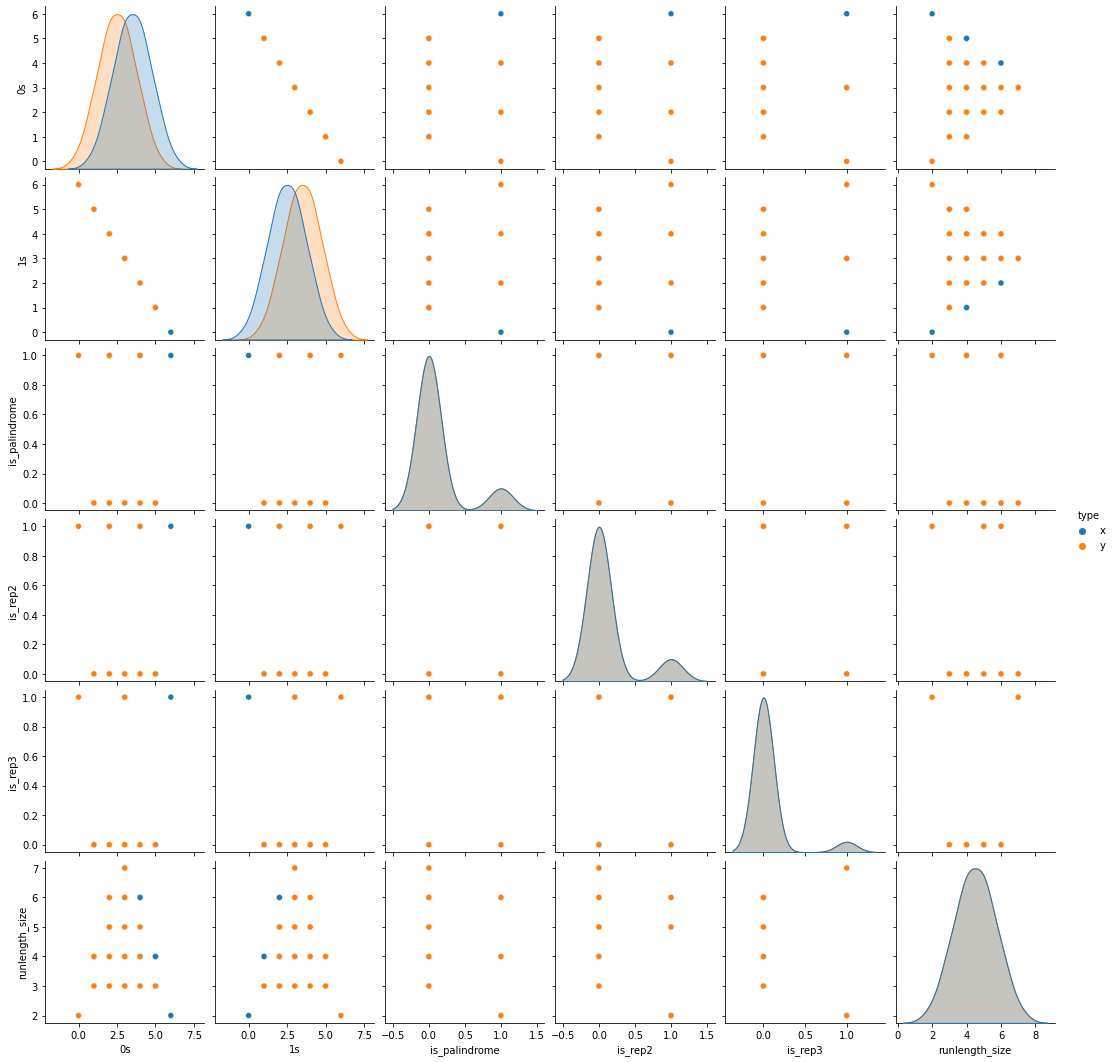

In [42]:
sns.pairplot(stimuli[['type'] + structures], hue='type')

In [43]:
stimuli[['type'] + structures].corr()

,0s,1s,is_palindrome,is_rep2,is_rep3,runlength_size
0s,1.000000e+00,-1.000000e+00,6.638306e-17,6.638306e-17,2.486840e-17,-3.445867e-16
1s,-1.000000e+00,1.000000e+00,-4.925195e-17,-4.925195e-17,-4.827396e-17,4.256659e-16
is_palindrome,6.638306e-17,-4.925195e-17,1.000000e+00,4.285714e-01,2.927700e-01,-1.690309e-01
is_rep2,6.638306e-17,-4.925195e-17,4.285714e-01,1.000000e+00,2.927700e-01,-6.568168e-17
is_rep3,2.486840e-17,-4.827396e-17,2.927700e-01,2.927700e-01,1.000000e+00,-1.362099e-16
runlength_size,-3.445867e-16,4.256659e-16,-1.690309e-01,-6.568168e-17,-1.362099e-16,1.000000e+00


In [44]:
df_stimuli = df_stimuli.reset_index()
strings_rev = {v: i for i, v in strings.items()}
df_stimuli['string'] = df_stimuli['stimulus'].map(lambda x: strings_rev[x])
df_stimuli['actual'] = [x['string'] if x['condition'] == 'x' else reverse_letter(x['string']) for i,x in df_stimuli.iterrows()]
# df_stimuli.set_index(['id', 'condition', 'stimulus', 'string', 'actual']).to_csv('df_stimuli.tsv', sep='\t')


In [45]:
means = df_stimuli.groupby(['actual'])[['effect', 'significance', 'complexity', 'regularity', 'randomness']].mean()
means = means.reset_index()
means['actual'] = means['actual'].astype(str)
stimuli['actual'] = stimuli['actual'].astype(str)

In [46]:
means.columns = ['actual', 'effect', 'significance', 'complexity', 'regularity', 'randomness']
stimuli_means = stimuli.set_index('actual').join(means.set_index('actual'))


In [47]:
stimuli_means

,item,stimulus,string,type,stm,0s,1s,is_palindrome,is_rep2,is_rep3,runlength,runlength_size,effect,significance,complexity,regularity,randomness
actual,,,,,,,,,,,,,,,,,
000000,Q1_1,X000000,000000,x,stm01,6,0,1,1,1,06,2.0,2.274510,2.450980,1.352941,5.000000,1.843137
000001,Q1_2,X000001,000001,x,stm02,5,1,0,0,0,0511,3.0,3.019608,2.960784,2.000000,4.254902,2.568627
000010,Q1_3,X000010,000010,x,stm03,5,1,0,0,0,041101,4.0,2.705882,2.705882,2.588235,3.254902,3.215686
000011,Q1_4,X000011,000011,x,stm04,4,2,0,0,0,0412,3.0,2.764706,2.784314,2.392157,3.980392,2.470588
000100,Q1_5,X000100,000100,x,stm05,5,1,0,0,0,031102,4.0,2.607843,2.647059,2.901961,3.529412,3.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100100,Q1_60,Y011011,011011,y,stm28,4,2,0,1,0,11021102,5.0,3.381818,3.236364,3.454545,3.545455,3.163636
100011,Q1_61,Y011100,011100,y,stm29,3,3,0,0,0,110312,4.0,3.363636,3.327273,3.381818,3.200000,3.345455
100010,Q1_62,Y011101,011101,y,stm30,4,2,0,0,0,11031101,5.0,3.290909,3.127273,3.600000,2.890909,3.690909


In [48]:
stimuli_means['condition'] = [0 if x == 'x' else 1 for x in stimuli_means['type']]
x = stimuli_means[[
        'condition',
        '0s',
        '1s',
        'is_palindrome',
        'is_rep2',
        'is_rep3',
        'runlength_size',
        'effect', 
        'significance', 
        'complexity',
        'regularity', 
        'randomness'
        ]]

In [49]:
pd.options.display.float_format = '{:.6f}'.format

In [50]:
pd.crosstab(x['condition'], x['0s'])

0s,0,1,2,3,4,5,6
condition,,,,,,,
0,0,1,5,10,10,5,1
1,1,5,10,10,5,1,0


In [51]:
x.corr()

,condition,0s,1s,is_palindrome,is_rep2,is_rep3,runlength_size,effect,significance,complexity,regularity,randomness
condition,1.000000,-0.408248,0.408248,-0.000000,-0.000000,-0.000000,0.000000,0.709111,0.626625,0.150403,0.040536,-0.056720
0s,-0.408248,1.000000,-1.000000,0.000000,0.000000,0.000000,-0.000000,-0.589850,-0.555997,-0.030264,-0.050785,0.115328
1s,0.408248,-1.000000,1.000000,-0.000000,-0.000000,-0.000000,0.000000,0.589850,0.555997,0.030264,0.050785,-0.115328
is_palindrome,-0.000000,0.000000,-0.000000,1.000000,0.428571,0.292770,-0.169031,-0.050043,0.036555,-0.269621,0.382881,-0.350515
is_rep2,-0.000000,0.000000,-0.000000,0.428571,1.000000,0.292770,-0.000000,-0.087434,-0.018402,-0.123296,0.245456,-0.200359
is_rep3,-0.000000,0.000000,-0.000000,0.292770,0.292770,1.000000,-0.000000,-0.233799,-0.188178,-0.520933,0.676587,-0.596386
runlength_size,0.000000,-0.000000,0.000000,-0.169031,-0.000000,-0.000000,1.000000,0.333354,0.373960,0.629549,-0.399034,0.465915
effect,0.709111,-0.589850,0.589850,-0.050043,-0.087434,-0.233799,0.333354,1.000000,0.944248,0.476949,-0.195495,0.165367
significance,0.626625,-0.555997,0.555997,0.036555,-0.018402,-0.188178,0.373960,0.944248,1.000000,0.481232,-0.186138,0.158402
complexity,0.150403,-0.030264,0.030264,-0.269621,-0.123296,-0.520933,0.629549,0.476949,0.481232,1.000000,-0.868300,0.887721


In [52]:
x.corr(method='spearman')

,condition,0s,1s,is_palindrome,is_rep2,is_rep3,runlength_size,effect,significance,complexity,regularity,randomness
condition,1.000000,-0.402559,0.402559,0.000000,0.000000,0.000000,0.000000,0.751434,0.659967,0.175943,0.032151,-0.043144
0s,-0.402559,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,-0.565518,-0.551334,-0.044659,-0.040871,0.089410
1s,0.402559,-1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.565518,0.551334,0.044659,0.040871,-0.089410
is_palindrome,0.000000,0.000000,0.000000,1.000000,0.428571,0.292770,-0.137796,-0.007676,0.048610,-0.200779,0.280132,-0.254517
is_rep2,0.000000,0.000000,0.000000,0.428571,1.000000,0.292770,0.074198,-0.031984,0.017909,-0.046039,0.167568,-0.139409
is_rep3,0.000000,0.000000,0.000000,0.292770,0.292770,1.000000,0.000000,-0.173044,-0.169529,-0.386140,0.419434,-0.417634
runlength_size,0.000000,0.000000,0.000000,-0.137796,0.074198,0.000000,1.000000,0.304210,0.356924,0.648250,-0.494075,0.516100
effect,0.751434,-0.565518,0.565518,-0.007676,-0.031984,-0.173044,0.304210,1.000000,0.932789,0.470464,-0.154348,0.142428
significance,0.659967,-0.551334,0.551334,0.048610,0.017909,-0.169529,0.356924,0.932789,1.000000,0.524323,-0.213765,0.205412
complexity,0.175943,-0.044659,0.044659,-0.200779,-0.046039,-0.386140,0.648250,0.470464,0.524323,1.000000,-0.851139,0.865458


(0.0, 6.0)

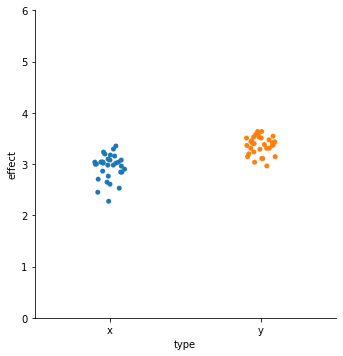

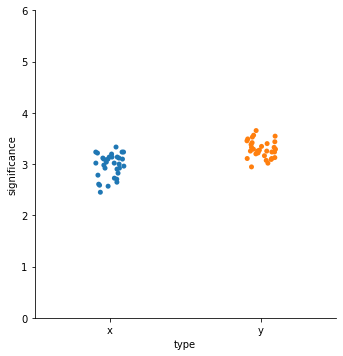

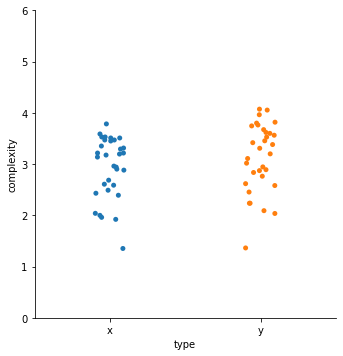

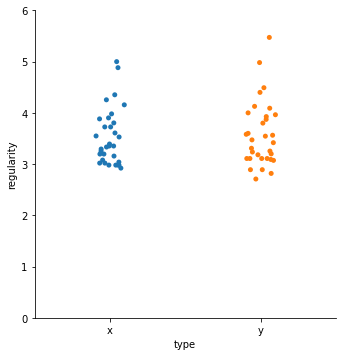

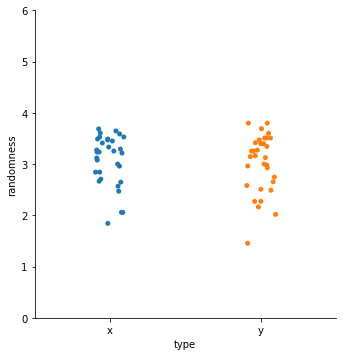

In [53]:
sns.catplot(x='type', y='effect', data=stimuli_means)
plt.ylim((0, 6))
sns.catplot(x='type', y='significance', data=stimuli_means)
plt.ylim((0, 6))
sns.catplot(x='type', y='complexity', data=stimuli_means)
plt.ylim((0, 6))
sns.catplot(x='type', y='regularity', data=stimuli_means)
plt.ylim((0, 6))
sns.catplot(x='type', y='randomness', data=stimuli_means)
plt.ylim((0, 6))

(0.0, 6.0)

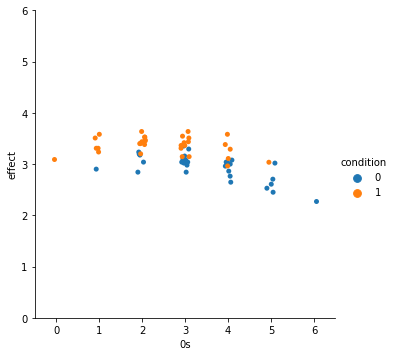

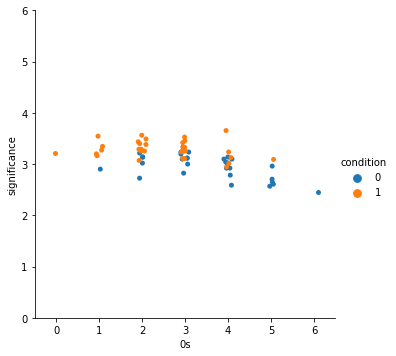

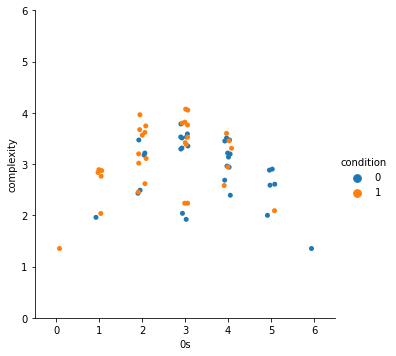

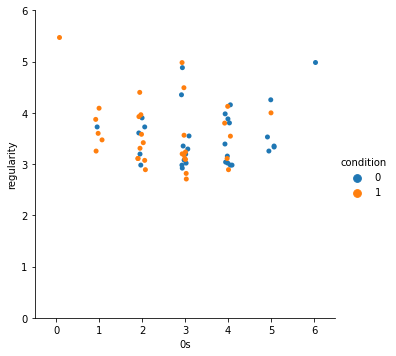

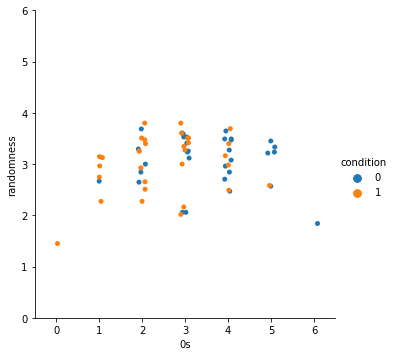

In [55]:
sns.catplot(x='0s', y='effect', hue='condition', data=stimuli_means)
plt.ylim((0, 6))
sns.catplot(x='0s', y='significance', hue='condition', data=stimuli_means)
plt.ylim((0, 6))
sns.catplot(x='0s', y='complexity', hue='condition', data=stimuli_means)
plt.ylim((0, 6))
sns.catplot(x='0s', y='regularity', hue='condition', data=stimuli_means)
plt.ylim((0, 6))
sns.catplot(x='0s', y='randomness', hue='condition', data=stimuli_means)
plt.ylim((0, 6))


(0.0, 6.0)

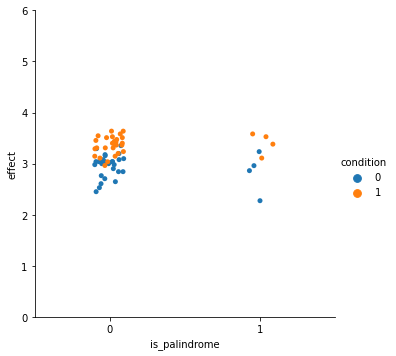

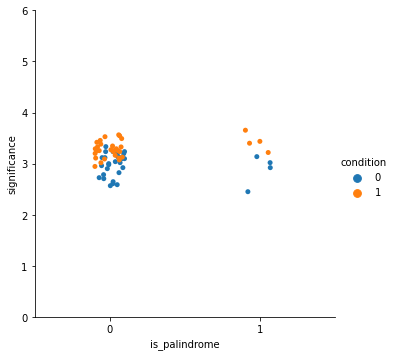

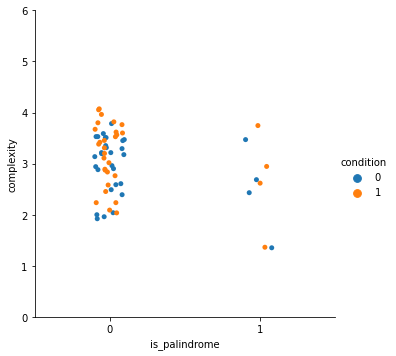

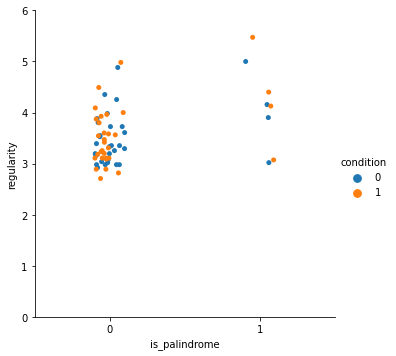

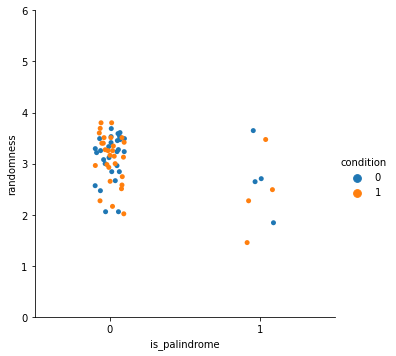

In [56]:
sns.catplot(x='is_palindrome', y='effect', hue='condition', data=stimuli_means)
plt.ylim((0, 6))
sns.catplot(x='is_palindrome', y='significance', hue='condition', data=stimuli_means)
plt.ylim((0, 6))
sns.catplot(x='is_palindrome', y='complexity', hue='condition', data=stimuli_means)
plt.ylim((0, 6))
sns.catplot(x='is_palindrome', y='regularity', hue='condition', data=stimuli_means)
plt.ylim((0, 6))
sns.catplot(x='is_palindrome', y='randomness', hue='condition', data=stimuli_means)
plt.ylim((0, 6))

(0.0, 6.0)

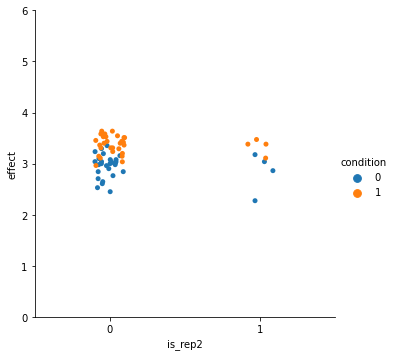

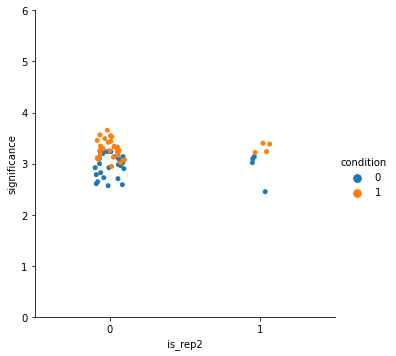

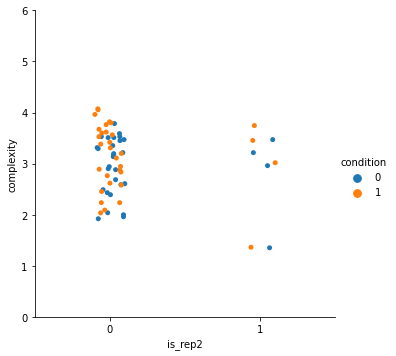

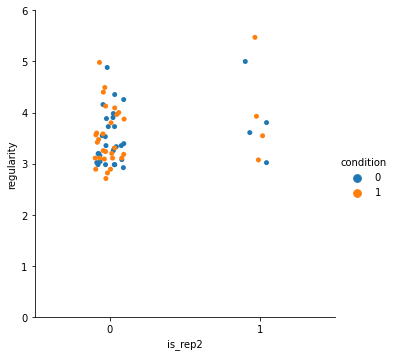

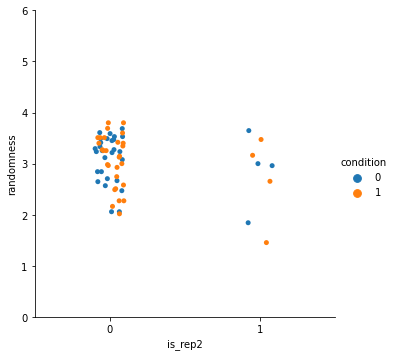

In [57]:
sns.catplot(x='is_rep2', y='effect', hue='condition', data=stimuli_means)
plt.ylim((0, 6))
sns.catplot(x='is_rep2', y='significance', hue='condition', data=stimuli_means)
plt.ylim((0, 6))
sns.catplot(x='is_rep2', y='complexity', hue='condition', data=stimuli_means)
plt.ylim((0, 6))
sns.catplot(x='is_rep2', y='regularity', hue='condition', data=stimuli_means)
plt.ylim((0, 6))
sns.catplot(x='is_rep2', y='randomness', hue='condition', data=stimuli_means)
plt.ylim((0, 6))

(0.0, 6.0)

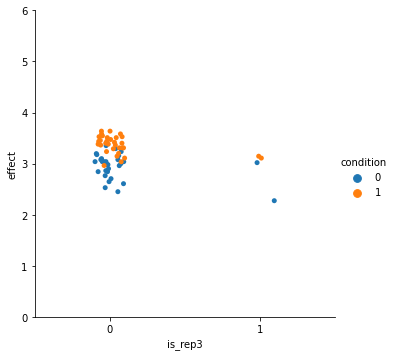

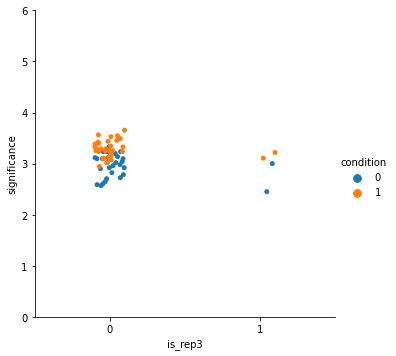

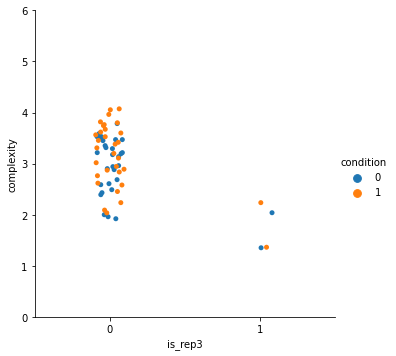

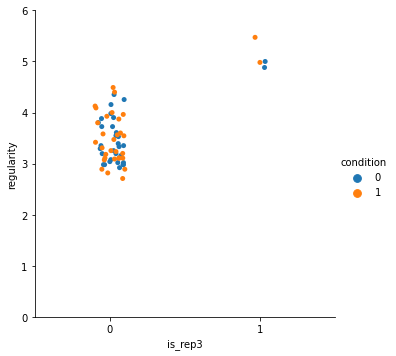

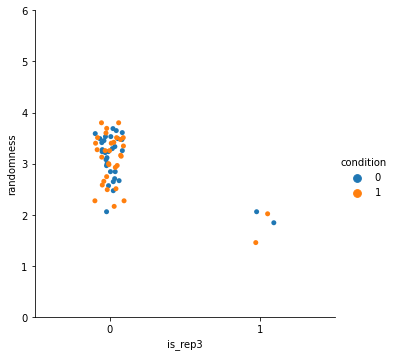

In [58]:
sns.catplot(x='is_rep3', y='effect', hue='condition', data=stimuli_means)
plt.ylim((0, 6))
sns.catplot(x='is_rep3', y='significance', hue='condition', data=stimuli_means)
plt.ylim((0, 6))
sns.catplot(x='is_rep3', y='complexity', hue='condition', data=stimuli_means)
plt.ylim((0, 6))
sns.catplot(x='is_rep3', y='regularity', hue='condition', data=stimuli_means)
plt.ylim((0, 6))
sns.catplot(x='is_rep3', y='randomness', hue='condition', data=stimuli_means)
plt.ylim((0, 6))


(0.0, 6.0)

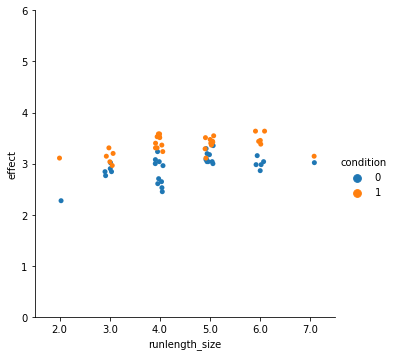

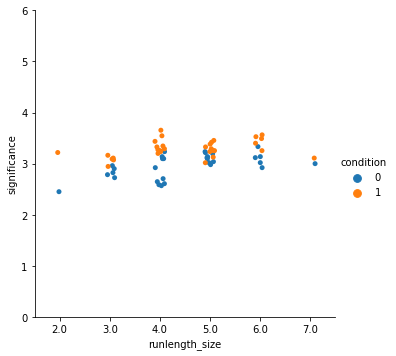

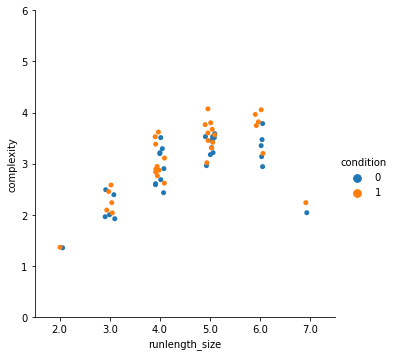

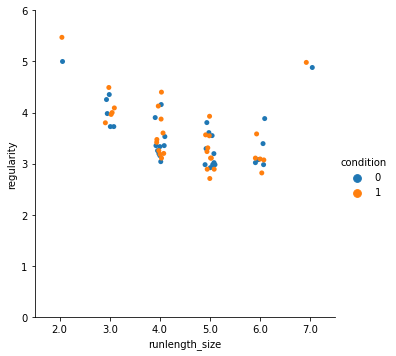

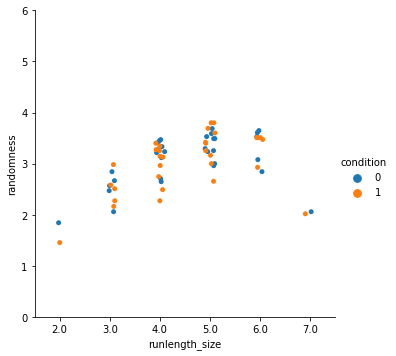

In [59]:
sns.catplot(x='runlength_size', y='effect', hue='condition', data=stimuli_means)
plt.ylim((0, 6))
sns.catplot(x='runlength_size', y='significance', hue='condition', data=stimuli_means)
plt.ylim((0, 6))
sns.catplot(x='runlength_size', y='complexity', hue='condition', data=stimuli_means)
plt.ylim((0, 6))
sns.catplot(x='runlength_size', y='regularity', hue='condition', data=stimuli_means)
plt.ylim((0, 6))
sns.catplot(x='runlength_size', y='randomness', hue='condition', data=stimuli_means)
plt.ylim((0, 6))

In [61]:
df['gender'].value_counts()

M    66
F    39
o     1
Name: gender, dtype: int64

In [74]:
df['education'].value_counts().sort_index()

1     2
2    22
3    18
4    60
5     3
6     1
Name: education, dtype: int64

In [75]:
df['occupation'].value_counts().sort_index()

1    41
2    12
3    31
4     5
6    11
7     1
8     1
9     4
Name: occupation, dtype: int64

In [76]:
df['ses'].value_counts().sort_index()

1     6
2    21
3    65
4    13
5     1
Name: ses, dtype: int64

In [65]:
df['religion'].value_counts()

なし                     85
仏教                     15
真言宗                     1
キリスト教プロテスタント・メソジスト系     1
仏教、神道                   1
神式                      1
仏教　神道                   1
仏教、キリスト教                1
Name: religion, dtype: int64

In [77]:
df['funeral'].value_counts().sort_index()

1    92
2     3
3     4
6     7
Name: funeral, dtype: int64

In [67]:
df['lang_jp_level'].value_counts()

1    106
Name: lang_jp_level, dtype: int64

In [68]:
df['nationality'].value_counts()

1    106
Name: nationality, dtype: int64

(-4.0, 4.0)

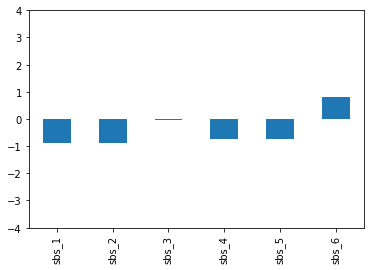

In [69]:
df[['sbs_1', 'sbs_2', 'sbs_3', 'sbs_4','sbs_5', 'sbs_6']].mean().plot(kind='bar')
plt.ylim((-4, 4))

In [70]:
df[['sbs_1', 'sbs_2', 'sbs_3', 'sbs_4','sbs_5', 'sbs_6']].corr()

,sbs_1,sbs_2,sbs_3,sbs_4,sbs_5,sbs_6
sbs_1,1.000000,0.851958,0.665500,0.666104,0.741555,0.649684
sbs_2,0.851958,1.000000,0.737787,0.765801,0.857646,0.642904
sbs_3,0.665500,0.737787,1.000000,0.805649,0.788787,0.736641
sbs_4,0.666104,0.765801,0.805649,1.000000,0.855456,0.643045
sbs_5,0.741555,0.857646,0.788787,0.855456,1.000000,0.685251
sbs_6,0.649684,0.642904,0.736641,0.643045,0.685251,1.000000


<AxesSubplot:>

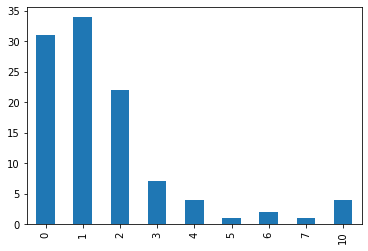

In [71]:
df['religious_freq'].value_counts().sort_index().plot(kind='bar')

<AxesSubplot:>

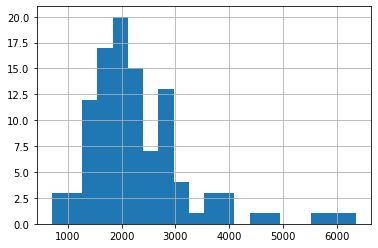

In [72]:
df['duration'].hist(bins=20)